In [110]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from api_key_coingecko import API_KEY

In [111]:
url = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart" #api end point 

days_to_analyse = 2
currency = 'usd'

headers = {
    "accept": "application/json",
    "x-cg-demo-api-key": API_KEY
}

params = {
    'vs_currency' : currency,
    'days' : str(days_to_analyse)
}

response = requests.get(url, params=params, headers=headers)
data = response.json()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [112]:
def plot_top_5_cryptos():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 5,
        'page': 1,
        'sparkline': False
    }

    response = requests.get(url, headers=headers, params=params).json()

    labels = [coin['name'] for coin in response]
    sizes = [coin['market_cap'] for coin in response]

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Top-5 Kryptowährungen nach Marktkapitalisierung (aktuell)')
    plt.axis('equal')
    plt.show()


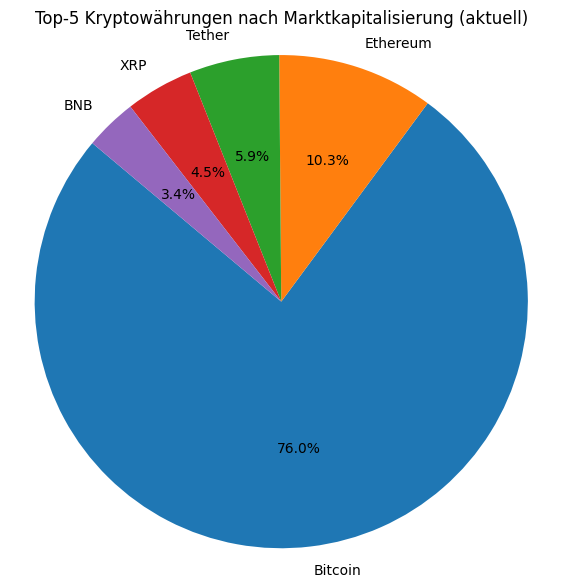

In [113]:
plot_top_5_cryptos()

In [114]:
def plot_bitcoin_marketcap_1y():
    url = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        'vs_currency': 'usd',
        'days': '365',
        'interval': 'daily'
    }

    response = requests.get(url, headers=headers, params=params).json()
    market_caps = response['market_caps']

    dates = [datetime.fromtimestamp(item[0] / 1000) for item in market_caps]
    values = [item[1] for item in market_caps]

    plt.figure(figsize=(10, 5))
    plt.plot(dates, values, color='orange')
    plt.title('Dynamic der Bitcoin Marktkapitalisierung innerhalb letzes Jahr')
    plt.xlabel('Datum')
    plt.ylabel('Kapitalisierung (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


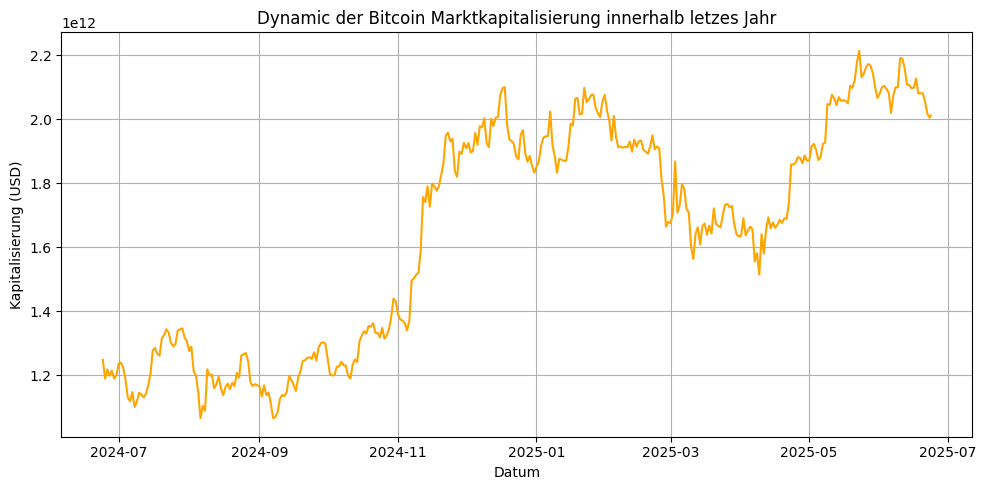

In [115]:
plot_bitcoin_marketcap_1y()

In [116]:
def plot_top5_marketcap_growth():
    top5 = ['bitcoin', 'ethereum', 'tether', 'binancecoin', 'solana']
    days = 180
    growth_data = []

    for token in top5:
        url = f"https://api.coingecko.com/api/v3/coins/{token}/market_chart"
        params = {'vs_currency': 'usd', 'days': days}
        response = requests.get(url, headers=headers, params=params).json()
        market_caps = response['market_caps']
        if not market_caps:
            continue
        start_cap = market_caps[0][1]
        end_cap = market_caps[-1][1]
        growth_pct = ((end_cap - start_cap) / start_cap) * 100
        growth_data.append((token.capitalize(), growth_pct))

    labels, growth = zip(*growth_data)
    plt.figure(figsize=(9, 5))
    plt.bar(labels, growth, color='purple')
    plt.title('Kapitalisierungswachstum den Top-5 Kryptowährungen innerhalb letzte 6 Monate (%)')
    plt.ylabel('Wachstum, %')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


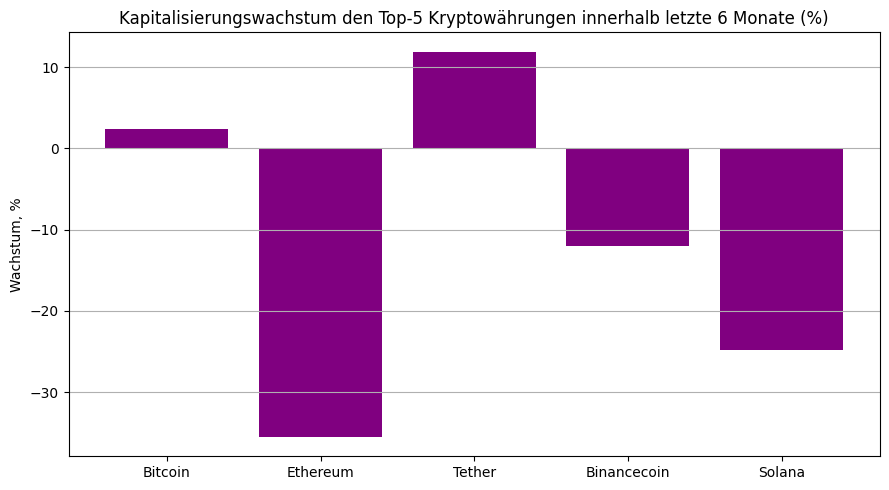

In [117]:
plot_top5_marketcap_growth()

In [118]:
def plot_total_marketcap_monthly():
    url = "https://api.coingecko.com/api/v3/global/market_chart"
    params = {
        'vs_currency': 'usd',
        'days': 730  # 2 года
    }

    response = requests.get(url, headers=headers, params=params).json()
    caps = response['market_cap']

    df = pd.DataFrame(caps, columns=['timestamp', 'market_cap'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    monthly = df['market_cap'].resample('M').mean()

    plt.figure(figsize=(10, 5))
    plt.plot(monthly.index, monthly.values, marker='o')
    plt.title('Общая капитализация крипторынка (по месяцам, 2 года)')
    plt.xlabel('Месяц')
    plt.ylabel('Капитализация (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [119]:
plot_total_marketcap_monthly()

KeyError: 'market_cap'

In [ ]:
def plot_market_dominance():
    url = "https://api.coingecko.com/api/v3/global"
    global_data = requests.get(url, headers=headers).json()['data']['market_cap_percentage']

    keys = ['btc', 'eth', 'bnb', 'sol', 'usdt']
    labels = [k.upper() for k in keys]
    values = [global_data[k] for k in keys]

    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Anteil der Top-Kryptowährungen in gesamten Kapitalisierung (aktuell)')
    plt.axis('equal')
    plt.show()


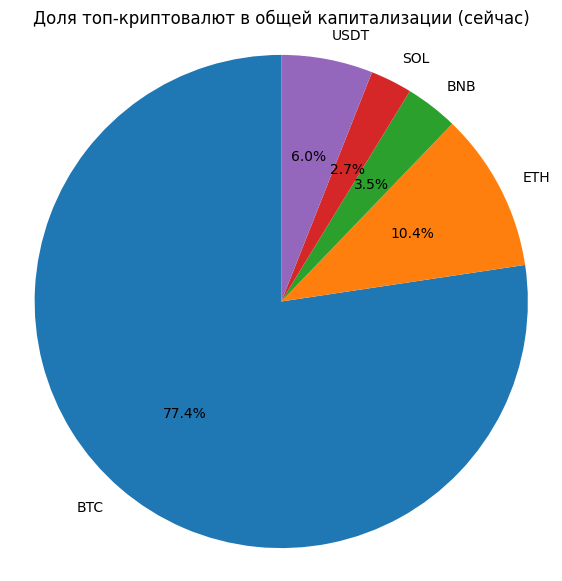

In [ ]:
plot_market_dominance()

In [ ]:
def plot_news_impact_demo():
    dates = pd.date_range(end=datetime.today(), periods=10).to_pydatetime().tolist()
    market_caps = [600e9, 610e9, 615e9, 590e9, 620e9, 650e9, 640e9, 660e9, 670e9, 660e9]
    annotations = {
        3: "SEC заявила о проверке Binance",
        5: "ETF по BTC одобрен в США",
        8: "Хак Solana DEX"
    }

    plt.figure(figsize=(10, 5))
    plt.plot(dates, market_caps, marker='o', linestyle='-')
    for i, text in annotations.items():
        plt.annotate(text, xy=(dates[i], market_caps[i]), xytext=(dates[i], market_caps[i]+20e9),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9)

    plt.title('Пример влияния новостей на капитализацию')
    plt.ylabel('Капитализация (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


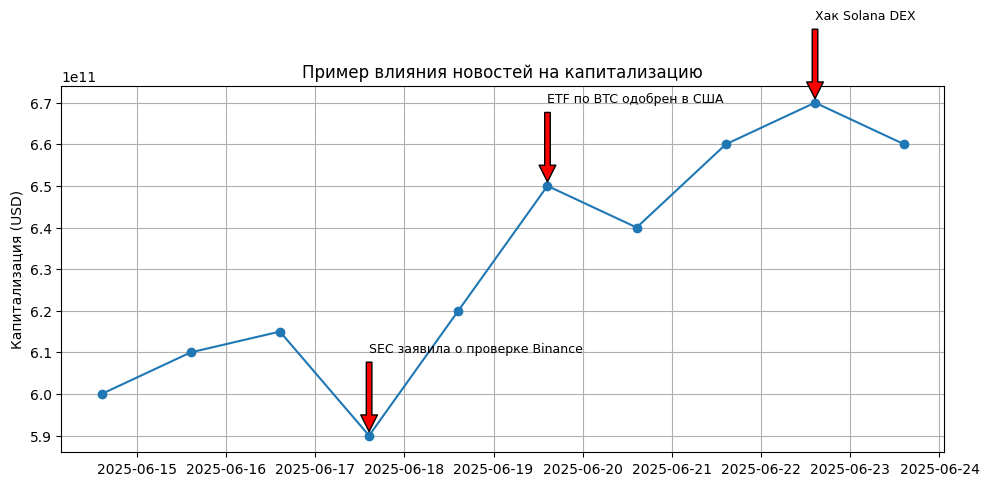

In [ ]:
plot_news_impact_demo() 